# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('08-x_train-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('08-x_test-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('08-y_train-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('08-y_test-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1985,0.447231,-11.604174,21.490801,0.038471,-0.012293,0.144106,28.098433,-10.617289,20.953278,-24.534029,...,12.985882,522.951538,1133.895142,-30.807289,1609.510742,823.846802,-40.938789,2569.409912,798.029785,-42.804501
1042,0.130339,-13.971890,21.746626,-0.008703,-0.013396,0.040137,26.985868,-0.558767,16.637335,-7.789950,...,4.312049,534.695984,1314.701050,-144.111618,1540.003052,1082.633667,-148.148804,2535.023926,834.851501,-149.138763
891,0.139997,-11.060719,19.946362,0.013390,-0.012108,0.033937,28.312416,-1.162980,18.854933,-9.202812,...,11.208985,424.967590,1218.401245,-80.970428,1408.374634,879.948120,-87.788223,2442.695801,782.476257,-92.060295
2368,0.095909,-16.350796,26.492107,0.050327,-0.012176,0.020982,31.657263,8.626080,13.638150,10.352103,...,18.536983,618.059448,1312.831299,-63.806530,1599.830322,1080.459595,-72.440758,2624.917480,875.469421,-78.148018
2074,0.207064,-11.585189,21.526285,0.010757,-0.012373,0.056513,32.527023,-5.295373,17.996965,-9.502275,...,13.354664,470.853241,1216.402954,-88.774590,1420.680054,937.014832,-93.780037,2443.020996,830.303101,-98.739037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.705233,-10.934845,20.832191,0.032123,-0.014040,0.296190,29.328007,-1.673850,16.420149,-14.524237,...,16.508810,505.037109,1200.989746,-46.904739,1440.581177,908.405945,-51.135757,2567.123535,652.237549,-58.575439
835,0.152195,-18.900702,25.110928,0.022950,-0.015909,0.045306,29.697210,8.321755,32.056129,-5.489374,...,19.120968,389.106476,1101.953979,-1.563233,1522.205444,943.652405,-28.814367,2340.425293,807.583984,-25.708191
1653,0.393978,-9.785304,16.518093,0.046550,-0.023924,0.109758,33.946442,-13.765141,20.133909,-17.838442,...,13.534039,511.860992,1263.066162,-32.984955,1529.643555,944.030762,-40.274120,2502.376953,833.882385,-42.945442
2607,0.741847,-5.888695,14.027196,0.097359,-0.012075,0.363559,10.607660,-2.755274,8.066515,-23.939238,...,9.214839,579.768677,1010.931824,-59.240295,1587.181641,830.136902,-65.184532,2653.903320,608.805115,-67.819084


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **MODELO DE MARCHINE LEARNING**

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [6]:
#para generar 600 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(600):

  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.5613126079447323 
 prueba :1 PRECISION ====  0.5613126079447323 
 prueba :2 PRECISION ====  0.5613126079447323 
 prueba :3 PRECISION ====  0.5613126079447323 
 prueba :4 PRECISION ====  0.5613126079447323 
 prueba :5 PRECISION ====  0.5613126079447323 
 prueba :6 PRECISION ====  0.5613126079447323 
 prueba :7 PRECISION ====  0.5613126079447323 
 prueba :8 PRECISION ====  0.5613126079447323 
 prueba :9 PRECISION ====  0.5613126079447323 
 prueba :10 PRECISION ====  0.5613126079447323 
 prueba :11 PRECISION ====  0.5613126079447323 
 prueba :12 PRECISION ====  0.5613126079447323 
 prueba :13 PRECISION ====  0.5613126079447323 
 prueba :14 PRECISION ====  0.5613126079447323 
 prueba :15 PRECISION ====  0.5613126079447323 
 prueba :16 PRECISION ====  0.5613126079447323 
 prueba :17 PRECISION ====  0.5613126079447323 
 prueba :18 PRECISION ====  0.5613126079447323 
 prueba :19 PRECISION ====  0.5613126079447323 
 prueba :20 PRECISION ====  0.5613126079447323 
 p

In [7]:
y_predict = clf.predict(x_test)
y_predict

array([2, 2, 1, 2, 3, 0, 3, 1, 1, 0, 2, 2, 2, 3, 0, 2, 3, 3, 2, 2, 1, 2,
       3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 3,
       2, 2, 3, 2, 0, 2, 1, 3, 2, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 2, 3, 2, 3, 2, 3, 0, 2, 2, 0, 2, 0, 3, 3, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3,
       2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 2, 3, 0, 3,
       0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 3, 1, 2, 0, 2, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 3, 2, 1, 3, 2, 0, 2, 1, 0, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 3, 1, 2, 0, 0, 2, 2, 2, 3, 0, 2, 2, 3, 3, 0, 1, 2, 3, 3, 2,
       2, 2, 0, 3, 2, 2, 2, 2, 0, 3, 0, 2, 3, 2, 2, 2, 0, 2, 3, 2, 0, 2,
       2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 3, 0, 2, 2, 2, 2, 2,
       1, 3, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,

# **EVALUACION**

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        81
           1       0.53      0.26      0.35       101
           2       0.55      0.76      0.64       237
           3       0.59      0.43      0.50       160

    accuracy                           0.56       579
   macro avg       0.56      0.52      0.52       579
weighted avg       0.56      0.56      0.54       579



In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        81
           1       0.53      0.26      0.35       101
           2       0.55      0.76      0.64       237
           3       0.59      0.43      0.50       160

    accuracy                           0.56       579
   macro avg       0.56      0.52      0.52       579
weighted avg       0.56      0.56      0.54       579

Matriz de confusión, sin normalización
[[ 51   7  22   1]
 [ 27  26  41   7]
 [  9  10 179  39]
 [  3   6  82  69]]


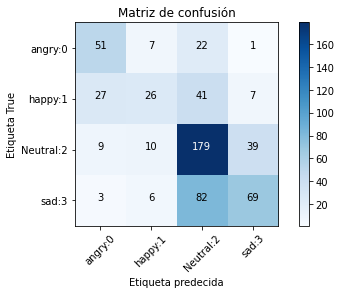

In [10]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')